# Hashing

Hashing refers to the process of generating a fixed-size output from an input of variable size using the mathematical formulas known as hash functions. This technique determines an index or location for the storage of an item in a data structure.

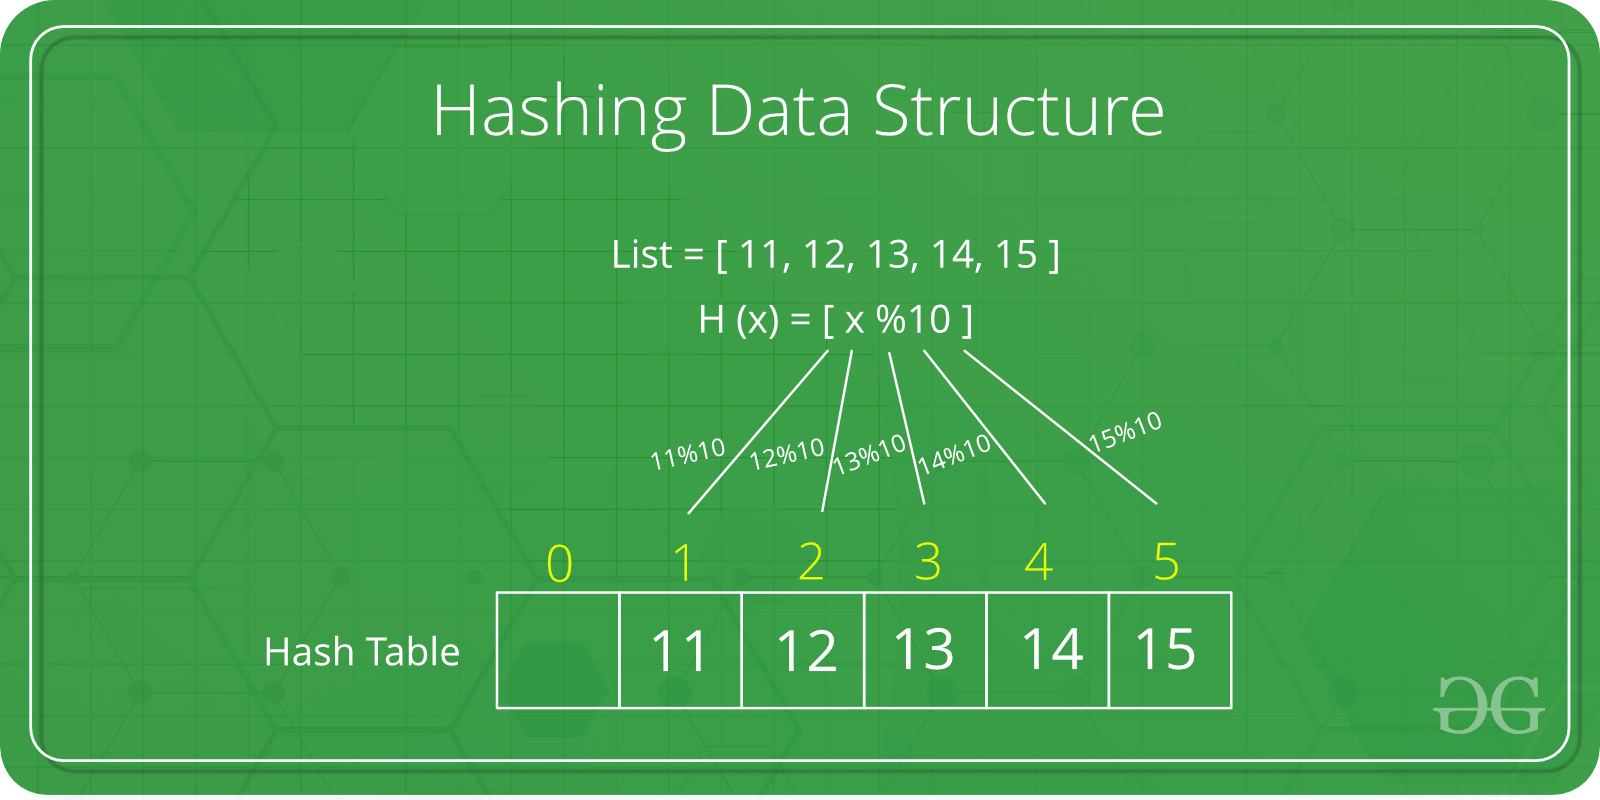

In [1]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

class HashTable:
    def __init__(self, size=10):
        self.size = size
        self.table = [None] * size

    def _hash_function(self, key):
        return hash(key) % self.size

    def insert(self, key, value):
        index = self._hash_function(key)
        new_node = Node(key, value)
        
        if self.table[index] is None:
            self.table[index] = new_node
        else:
            current = self.table[index]
            while current.next:
                if current.key == key:
                    current.value = value
                    return
                current = current.next
            if current.key == key:
                current.value = value
            else:
                current.next = new_node

    def get(self, key):
        index = self._hash_function(key)
        current = self.table[index]
        
        while current:
            if current.key == key:
                return current.value
            current = current.next
        return None

    def delete(self, key):
        index = self._hash_function(key)
        current = self.table[index]
        prev = None
        
        while current:
            if current.key == key:
                if prev:
                    prev.next = current.next
                else:
                    self.table[index] = current.next
                return True
            prev = current
            current = current.next
        return False
hash_table = HashTable()
hash_table.insert("apple", 1)
hash_table.insert("banana", 2)
hash_table.insert("orange", 3)
print(hash_table.get("apple"))
print(hash_table.get("banana"))
hash_table.delete("banana")
print(hash_table.get("banana"))


1
2
None


In [6]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None
    
    def addfront(self, key, value):
        new_node = Node(key, value)
        new_node.next = self.head
        self.head = new_node

    def addend(self, key, value):
        new_node = Node(key, value)
        if self.head is None:
            self.head = new_node
        else:
            temp = self.head
            while temp.next is not None:
                temp = temp.next
            temp.next = new_node

    def addatpos(self, key, value, pos):
        new_node = Node(key, value)
        if pos == 0:
            new_node.next = self.head
            self.head = new_node
            return
        
        temp = self.head
        count = 0
        while temp is not None and count < pos - 1:
            temp = temp.next
            count += 1
        
        if temp is None:
            raise IndexError("Position out of bounds")
        
        new_node.next = temp.next
        temp.next = new_node

    def deleteatpos(self, pos):
        if self.head is None:
            raise IndexError("Position out of bounds")
        
        if pos == 0:
            self.head = self.head.next
            return
        
        temp = self.head
        count = 0
        while temp is not None and count < pos - 1:
            temp = temp.next
            count += 1
        
        if temp is None or temp.next is None:
            raise IndexError("Position out of bounds")
        
        temp.next = temp.next.next

    def search(self, key):
        temp = self.head
        pos = 0
        while temp is not None:
            if temp.key == key:
                return pos
            temp = temp.next
            pos += 1
        return -1

    def printlist(self):
        temp = self.head
        while temp is not None:
            print(f"({temp.key}, {temp.value})", end=" -> ")
            temp = temp.next
        print("None")

class HashTable:
    def __init__(self, size=10):
        self.size = size
        self.table = [LinkedList() for _ in range(size)]

    def _hash_function(self, key):
        return hash(key) % self.size

    def insert(self, key, value):
        index = self._hash_function(key)
        linked_list = self.table[index]
        
        temp = linked_list.head
        while temp:
            if temp.key == key:
                temp.value = value  # Update existing value
                return
            temp = temp.next
        
        linked_list.addend(key, value)

    def get(self, key):
        index = self._hash_function(key)
        linked_list = self.table[index]
        
        temp = linked_list.head
        while temp:
            if temp.key == key:
                return temp.value
            temp = temp.next
        return None

    def delete(self, key):
        index = self._hash_function(key)
        linked_list = self.table[index]
        
        pos = linked_list.search(key)
        if pos != -1:
            linked_list.deleteatpos(pos)
            return True
        return False

    def printtable(self):
        for i in range(self.size):
            print(f"Bucket {i}: ", end="")
            self.table[i].printlist()

# Example usage:
hash_table = HashTable()

# Insert key-value pairs
hash_table.insert("apple", 1)
hash_table.insert("banana", 2)
hash_table.insert("orange", 3)
hash_table.insert("melon", 4)
hash_table.insert("kiwi", 5)

# Retrieve values
print(hash_table.get("apple"))   # Output: 1
print(hash_table.get("banana"))  # Output: 2

# Delete a key
hash_table.delete("banana")
print(hash_table.get("banana"))  # Output: None

# Print the hash table
hash_table.printtable()


1
2
None
Bucket 0: None
Bucket 1: (kiwi, 5) -> None
Bucket 2: None
Bucket 3: (apple, 1) -> (melon, 4) -> None
Bucket 4: (orange, 3) -> None
Bucket 5: None
Bucket 6: None
Bucket 7: None
Bucket 8: None
Bucket 9: None


In [1]:
k = [22,10,47,56,100,50,92,99,79]#if n>10 use k%n
hashList = [False for _ in range(10)]
for e in k:
    for j in range(len(k)):
        x=((e%10)+j)%10
        if hashList[x]==False:
            hashList[x]=e
            break

print(hashList)

[10, 100, 22, 50, 92, 79, 56, 47, False, 99]


# Double Hashing
Double hashing is a collision resolution technique used in hash tables. It works by using two hash functions to compute two different hash values for a given key. The first hash function is used to compute the initial hash value, and the second hash function is used to compute the step size for the probing sequence.

Double hashing has the ability to have a low collision rate, as it uses two hash functions to compute the hash value and the step size. This means that the probability of a collision occurring is lower than in other collision resolution techniques such as linear probing or quadratic probing.

However, double hashing has a few drawbacks. First, it requires the use of two hash functions, which can increase the computational complexity of the insertion and search operations. Second, it requires a good choice of hash functions to achieve good performance. If the hash functions are not well-designed, the collision rate may still be high.

Advantages of Double hashing

The advantage of Double hashing is that it is one of the best forms of probing, producing a uniform distribution of records throughout a hash table.
This technique does not yield any clusters.
It is one of the effective methods for resolving collisions.
Double hashing can be done using : 
(hash1(key) + i * hash2(key)) % TABLE_SIZE 
Here hash1() and hash2() are hash functions and TABLE_SIZE 
is size of hash table. 

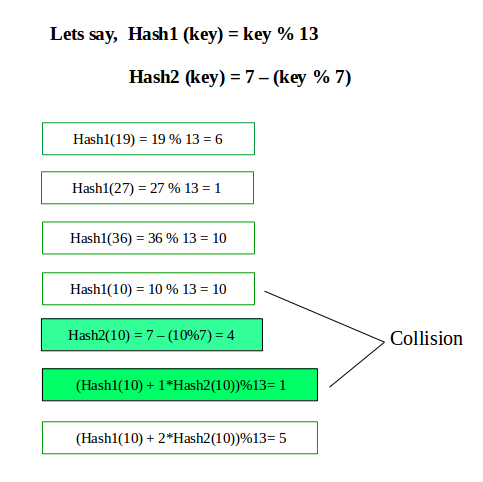

In [3]:
def hash1(k):
    h1 = k % 8
    return h1

def hash2(k):
    h2 = 8 - (k % 8)
    return h2

def combine(k, l, hash_table_size):
    h1 = hash1(k)
    h2 = hash2(k)
    i = 0
    while l[(h1 + i * h2) % hash_table_size] is not False:
        i += 1
    return (h1 + i * h2) % hash_table_size
keys = [22, 10, 47, 56, 92, 99, 79, 34, 21, 59, 9, 3]
hash_table_size = 13
hash_table = [False for _ in range(hash_table_size)]
for key in keys:
    position = combine(key, hash_table, hash_table_size)
    hash_table[position] = key

print(hash_table)


KeyboardInterrupt: 